# CODE TO BUILD A SIMPLE PERCEPTRON 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# example making new class predictions for a classification problem
from keras.models import Sequential
from keras.layers import Dense


speed_data = pd.read_csv("speed_decision_data.csv")

C:\Users\Dr. Ryan\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
speed_data.head()

,1 - Distance From Bump,Height of Bump,Speed
0,0.575374,0.680337,0
1,0.376002,0.278661,1
2,0.973890,0.741585,0
3,0.310378,0.342374,1
4,0.109521,0.268304,1


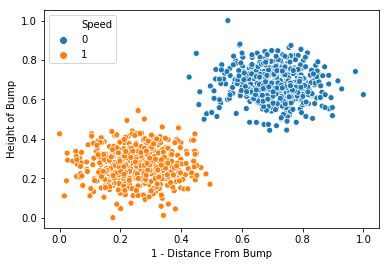

In [4]:
sns.scatterplot(speed_data['1 - Distance From Bump'], speed_data['Height of Bump'], hue = speed_data['Speed'])

In [5]:
X_train = speed_data[['1 - Distance From Bump', 'Height of Bump']]

In [6]:
y_train = speed_data['Speed']

In [31]:
# define and fit the final model
model = Sequential()
model.add(Dense(1, input_dim=2, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X_train, y_train, epochs=100, verbose=2)



Epoch 1/100
 - 0s - loss: 0.7959
Epoch 2/100
 - 0s - loss: 0.7849
Epoch 3/100
 - 0s - loss: 0.7750
Epoch 4/100
 - 0s - loss: 0.7659
Epoch 5/100
 - 0s - loss: 0.7577
Epoch 6/100
 - 0s - loss: 0.7497
Epoch 7/100
 - 0s - loss: 0.7423
Epoch 8/100
 - 0s - loss: 0.7356
Epoch 9/100
 - 0s - loss: 0.7294
Epoch 10/100
 - 0s - loss: 0.7235
Epoch 11/100
 - 0s - loss: 0.7178
Epoch 12/100
 - 0s - loss: 0.7126
Epoch 13/100
 - 0s - loss: 0.7074
Epoch 14/100
 - 0s - loss: 0.7024
Epoch 15/100
 - 0s - loss: 0.6976
Epoch 16/100
 - 0s - loss: 0.6928
Epoch 17/100
 - 0s - loss: 0.6882
Epoch 18/100
 - 0s - loss: 0.6837
Epoch 19/100
 - 0s - loss: 0.6792
Epoch 20/100
 - 0s - loss: 0.6748
Epoch 21/100
 - 0s - loss: 0.6704
Epoch 22/100
 - 0s - loss: 0.6660
Epoch 23/100
 - 0s - loss: 0.6616
Epoch 24/100
 - 0s - loss: 0.6573
Epoch 25/100
 - 0s - loss: 0.6530
Epoch 26/100
 - 0s - loss: 0.6487
Epoch 27/100
 - 0s - loss: 0.6445
Epoch 28/100
 - 0s - loss: 0.6402
Epoch 29/100
 - 0s - loss: 0.6360
Epoch 30/100
 - 0s - lo

In [32]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [33]:
# make a prediction
y_train_predict = model.predict_classes(X_train)


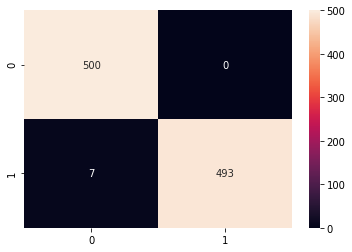

In [34]:
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_train, y_train_predict)

sns.heatmap(cm, annot=True, fmt="d")

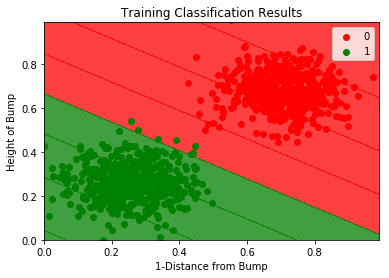

In [35]:
# https://medium.com/coinmonks/predicting-product-sales-through-ads-delivered-on-social-networking-sites-using-k-n-n-in-python-b9f955d184af


# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train.values, y_train.values
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() , stop = X_set[:, 0].max(), step = 0.01),
                     np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max(), step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    
plt.title('Training Classification Results')
plt.xlabel('1-Distance from Bump')
plt.ylabel('Height of Bump')
plt.legend()
plt.show()

In [12]:
weights, biases = model.layers[0].get_weights()

In [13]:
weights

array([[-1.24039   ],
       [-0.43883044]], dtype=float32)

In [14]:
biases

array([0.2649947], dtype=float32)